# BERT Com LIME

**Autor:** Luiz Fernando de Aguiar Lima

**Creditos do codigo:** Antonia Estefane Ribeiro Veras

**Orientador:** Adonias Caetano de Oliveira

**Instituição:** IFCE

**Dataset disponível em:
**


## Instalação de Pacotes

In [ ]:
!pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

In [ ]:
#hide
!pip install transformers

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=e56a932e16207859f4fb489bbfd882a9482aaa503d6a4d2cde15dc45436b8907
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


## Importação de Bibliotecas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from lime.lime_text import LimeTextExplainer

In [ ]:
#text preprocessing libraries
import pandas as pd
import re
from unidecode import unidecode
from string import punctuation
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#text classification libraries
from transformers import BertTokenizer, BertForSequenceClassification
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from scipy.special import expit


## Montagem do Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento do Dataset

In [ ]:
# Dataset do Kaggle
url = 'https://drive.google.com/file/d/158omMBNr9Mjzeor34uxPH2IugYwIJhU3/view?usp=sharing'

file_id = url.split('/')[-2]
read_url='https://drive.google.com/uc?id=' + file_id

# read the data
dataset = pd.read_csv(read_url, index_col=0)

# display the first 5 rows
dataset.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [ ]:
dataset.shape

(24783, 6)

## Pré-Processamento de Texto

In [ ]:
nltk.download('rslp')
nltk.download('stopwords')
stopwords_list = stopwords.words("english")
print(stopwords_list)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_process = dataset.copy()

In [ ]:
dataset.head()

count  hate_speech  offensive_language  neither  class  \
0      3            0                   0        3      2   
1      3            0                   3        0      1   
2      3            0                   3        0      1   
3      3            0                   2        1      1   
4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...

In [ ]:


# Processamento de texto
old_texts = dataset["tweet"]
new_texts = []

for text in old_texts:
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'(!{3,5} rt @\w+:)', '', text)  # Remove "!!! RT @..." e "!!!!! RT @..."
    text = re.sub(r'!', '', text) #remove exclamações
    text = re.sub(r'rt', '', text) #remove RT
    text = re.sub('@[^\s]+', '', text)  # Remove mentions
    text = re.sub('<[^<]+?>', '', text)  # Remove HTML tags
    text = ''.join(c for c in text if not c.isdigit())  # Remove digits
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)  # Remove URLs
    text = ''.join(c for c in text if c not in punctuation)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords_list])  # Remove stopwords
    text = text.replace("\"", "").replace("'", "")  # Remove quotes
    new_texts.append(text)

# Criar uma nova coluna 'processed_tweet' com os textos limpos
dataset["processed_tweet"] = new_texts

In [ ]:
data_process = dataset.copy()

In [ ]:
data_process

count  hate_speech  offensive_language  neither  class  \
0          3            0                   0        3      2   
1          3            0                   3        0      1   
2          3            0                   3        0      1   
3          3            0                   2        1      1   
4          6            0                   6        0      1   
...      ...          ...                 ...      ...    ...   
25291      3            0                   2        1      1   
25292      3            0                   1        2      2   
25294      3            0                   3        0      1   
25295      6            0                   6        0      1   
25296      3            0                   0        3      2   

                                                   tweet  \
0      !!! RT @mayasolovely: As a woman you shouldn't...   
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   
...                                                  ...   
25291  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   
25292  you've gone and broke the wrong heart baby, an...   
25294  young buck wanna eat!!.. dat nigguh like I ain...   
25295              youu got wild bitches tellin you lies   
25296  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   

                                         processed_tweet  
0      woman shouldnt complain cleaning house amp man...  
1      boy dats coldtyga dwn bad cuffin dat hoe st place  
2             dawg ever fuck bitch sta cry confused shit  
3                                       look like tranny  
4         shit hear might true might faker bitch told ya  
...                                                  ...  
25291  yous muthafin lie right tl trash mine bible sc...  
25292  youve gone broke wrong hea baby drove redneck ...  
25294  young buck wanna eat dat nigguh like aint fuck...  
25295                  youu got wild bitches tellin lies  
25296  ruffled ntac eileen dahlia beautiful color com...  

[24783 rows x 7 columns]

## Visualização dos Dados

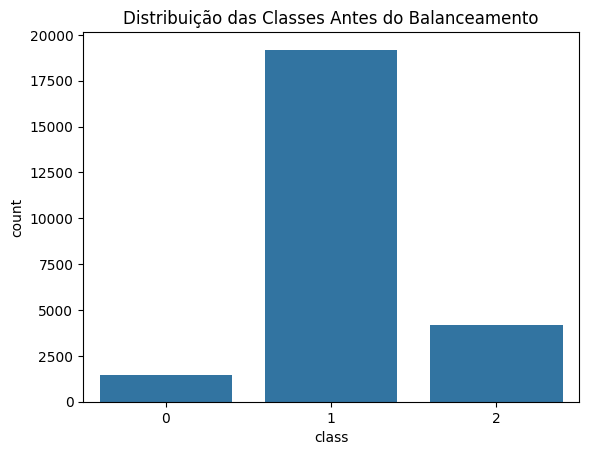

In [ ]:
sns.countplot(x = data_process['class'])
plt.title('Distribuição das Classes Antes do Balanceamento')
plt.show()

## Balanceamento dos Dados

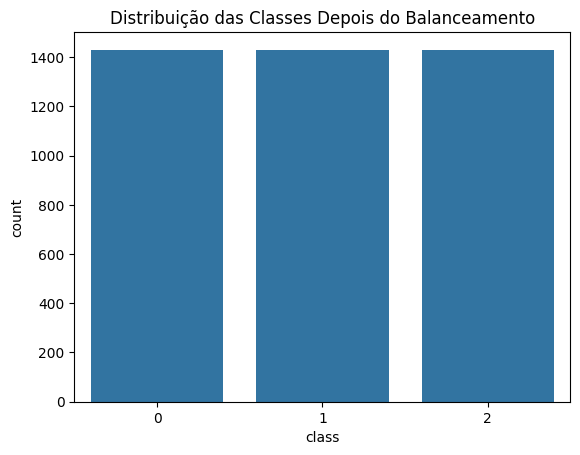

In [ ]:
# Balancear as classes com RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_bal, Y_bal = rus.fit_resample(dataset[['processed_tweet']], dataset['class'])

# adiciona cores

# Visualizar a distribuição das classes depois do balanceamento
sns.countplot(x=Y_bal)
plt.title('Distribuição das Classes Depois do Balanceamento')
plt.show()

## Criação da Wordcloud

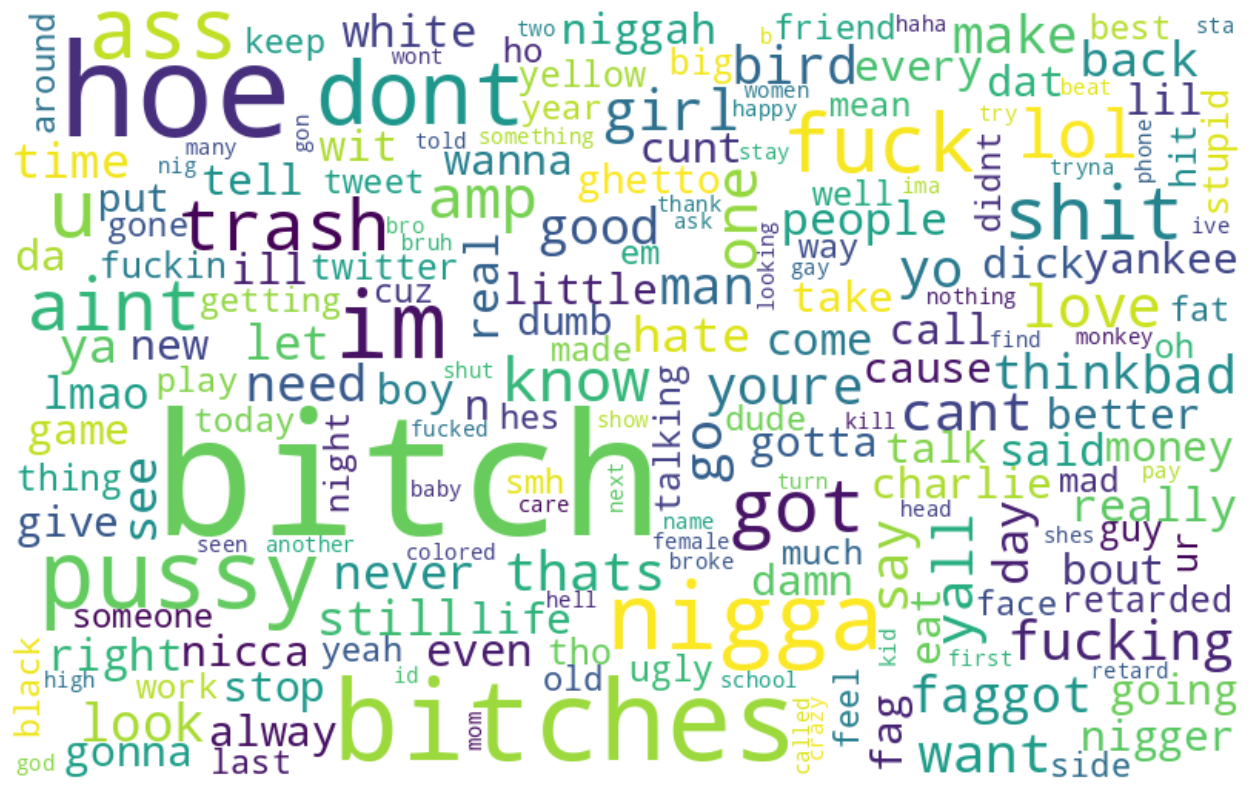

In [ ]:
new_texts = dataset["processed_tweet"]
all_words = ' '.join([text for text in new_texts])
word_cloud = WordCloud(width= 800, height= 500, max_font_size = 110, background_color="white", collocations = False).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Divisão dos Dados em Conjuntos de Treinamento, Validação e Teste

In [ ]:
train_df, test_df, train_label, test_label = train_test_split(X_bal, Y_bal, test_size=0.20, random_state=42)

In [ ]:
train_df, valid_df, train_label,  valid_label = train_test_split(train_df, train_label, test_size=0.20, random_state=42)

In [ ]:
label_names=["Discurso de odio","linguagem ofensiva", "Nenhum dos dois"]
label_names

['Discurso de odio', 'linguagem ofensiva', 'Nenhum dos dois']

## Inicialização do Tokenizador e do Modelo

In [ ]:
!pip install transformers
import transformers
from transformers import BertTokenizer, AlbertTokenizer

#PRETRAINED_LM = 'albert-base-v2'
#Use AlbertTokenizer for Albert models
#tokenizer = AlbertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)
#tokenizer

In [ ]:
#PRETRAINED_LM = 'bert-base-multilingual-cased'
#tokenizer = BertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)
#tokenizer

In [ ]:
PRETRAINED_LM = 'Hate-speech-CNERG/bert-base-uncased-hatexplain'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)
tokenizer

tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

BertTokenizer(name_or_path='Hate-speech-CNERG/bert-base-uncased-hatexplain', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

## Definição de Funções Auxiliares

In [ ]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

## Preparação dos dados para o treinamento do modelo

In [ ]:
train_input_ids, train_att_masks = encode(train_df['processed_tweet'].values.tolist())
valid_input_ids, valid_att_masks = encode(valid_df['processed_tweet'].values.tolist())
test_input_ids, test_att_masks = encode(test_df['processed_tweet'].values.tolist())

In [ ]:
import torch
train_y = torch.LongTensor(train_label.values)
valid_y = torch.LongTensor(valid_label.values)
test_y = torch.LongTensor(test_label.values)
train_y.size(),valid_y.size(),test_y.size()

(torch.Size([2745]), torch.Size([687]), torch.Size([858]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 16
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_dataset = TensorDataset(valid_input_ids, valid_att_masks, valid_y)
valid_sampler = SequentialSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, sampler=valid_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
train_label.unique()

array([2, 1, 0])

In [ ]:
from transformers import BertForSequenceClassification
N_labels = len(train_label.unique())
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels, # Make sure this matches the number of labels in your dataset
                                                      output_attentions=False,
                                                      output_hidden_states=False,
                                                      ignore_mismatched_sizes=True) # Add this argument

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.to(device)

In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# Best results: 07 and 08
EPOCHS = 5
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

## Treinamento do modelo

In [ ]:
#collapse-output
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))


    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()

            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_df) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(valid_df) / BATCH_SIZE), valid_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/172 [00:00<?, ?it/s]

Validation:   0%|          | 0/43 [00:00<?, ?it/s]

172/172 train loss: 1.0340645909309387 
43/43 val loss: 0.94662033541258 
Epoch:  2


Training:   0%|          | 0/172 [00:00<?, ?it/s]

Validation:   0%|          | 0/43 [00:00<?, ?it/s]

172/172 train loss: 0.8702179411816042 
43/43 val loss: 0.85451149871183 
Epoch:  3


Training:   0%|          | 0/172 [00:00<?, ?it/s]

Validation:   0%|          | 0/43 [00:00<?, ?it/s]

172/172 train loss: 0.7674676450185998 
43/43 val loss: 0.7606974202533101 
Epoch:  4


Training:   0%|          | 0/172 [00:00<?, ?it/s]

Validation:   0%|          | 0/43 [00:00<?, ?it/s]

172/172 train loss: 0.6800958183269168 
43/43 val loss: 0.6997921986635341 
Epoch:  5


Training:   0%|          | 0/172 [00:00<?, ?it/s]

Validation:   0%|          | 0/43 [00:00<?, ?it/s]

172/172 train loss: 0.6292205620990243 
43/43 val loss: 0.6787790891736053 


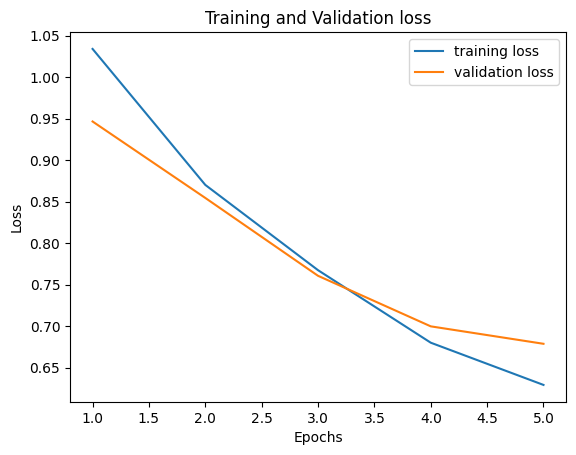

In [ ]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

## Avaliação do Modelo

In [ ]:
model.eval()
test_pred = []
test_loss= 0

with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        test_loss += loss.item()

        test_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
test_pred = np.concatenate(test_pred)

0it [00:00, ?it/s]

In [ ]:
from sklearn.metrics import classification_report
print('classifiation report')
print(classification_report(valid_pred, valid_label.to_numpy(), target_names=label_names))

#melhor ate agora 06

classifiation report
                    precision    recall  f1-score   support

  Discurso de odio       0.64      0.74      0.68       187
linguagem ofensiva       0.77      0.73      0.75       238
   Nenhum dos dois       0.86      0.81      0.83       262

          accuracy                           0.76       687
         macro avg       0.76      0.76      0.76       687
      weighted avg       0.77      0.76      0.76       687



In [ ]:
from scipy.special import expit

model.eval()
probabilities = []

with torch.no_grad():
  for step_num, batch_data in tqdm(enumerate(test_dataloader)):
      input_ids, att_mask, labels = [data.to(device) for data in batch_data]
      output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

      prob = expit(output.logits.cpu().detach().numpy())

      probabilities.append( prob )

probabilities = np.concatenate(probabilities)

0it [00:00, ?it/s]

In [ ]:
probabilities

array([[0.46681163, 0.17706515, 0.6958465 ],
       [0.2215171 , 0.8071896 , 0.33145204],
       [0.20415957, 0.47629237, 0.73888224],
       ...,
       [0.22896042, 0.7728087 , 0.3276368 ],
       [0.24633387, 0.7645956 , 0.31894806],
       [0.29020283, 0.3996992 , 0.63039535]], dtype=float32)

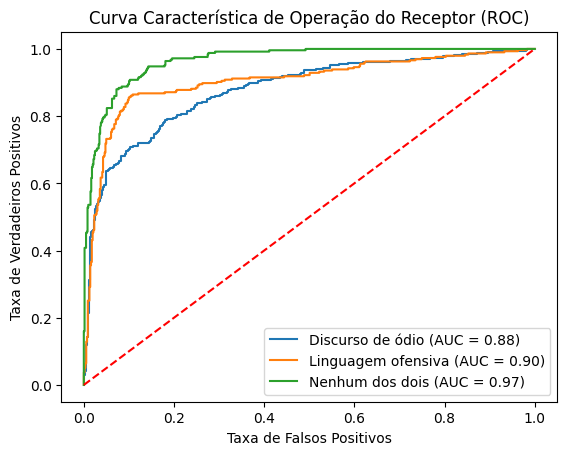

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Definindo suas classes
nomes_classes = ["Discurso de ódio", "Linguagem ofensiva", "Nenhum dos dois"]
classes = [0, 1, 2]  # Atribua um número a cada classe

# Binarizando os rótulos
test_label_binarized = label_binarize(test_label, classes=classes)

# Plotando a curva ROC para cada classe individualmente
for i, nome_classe in enumerate(nomes_classes):
    fper, tper, thresholds = roc_curve(test_label_binarized[:, i], probabilities[:, i])  # Use 'probabilidades' como um array 2D
    AUC = auc(fper, tper)
    plt.plot(fper, tper, label=f"{nome_classe} (AUC = {AUC:.2f})")

# Adicionando detalhes ao gráfico
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva Característica de Operação do Receptor (ROC)")
plt.legend()
plt.show()



In [ ]:
#fper, tper, thresholds = roc_curve(test_label.to_numpy(), probabilities[::,1])
#AUC = auc(fper, tper)
#plot_roc_curve(fper, tper, AUC)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

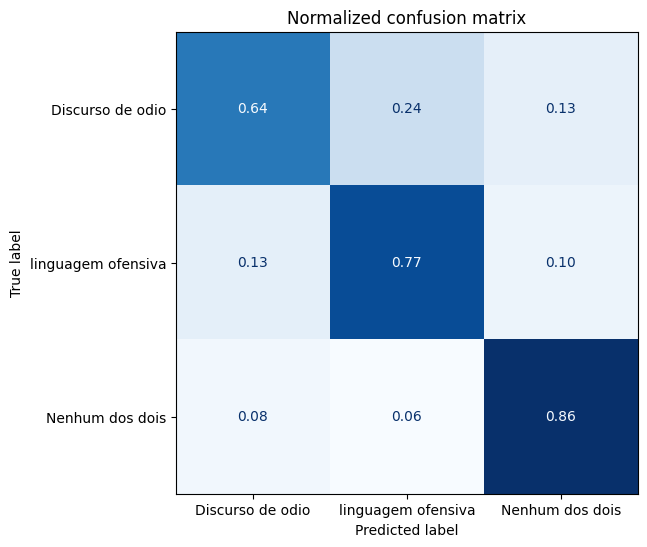

In [ ]:
plot_confusion_matrix(valid_pred,valid_label.to_numpy(),labels=label_names)

In [ ]:
# Adicionando as probabilidades para cada classe separadamente
test_df['prob_disc_odio'] = probabilities[:, 0]   # Probabilidade da classe 'Discurso de ódio'
test_df['prob_ling_ofensiva'] = probabilities[:, 1]  # Probabilidade da classe 'Linguagem ofensiva'
test_df['prob_nenhum'] = probabilities[:, 2]  # Probabilidade da classe 'Nenhum dos dois'

# Adicionando previsões
test_df['pred'] = test_pred

# Adicionando rótulos ao DataFrame
test_df['label'] = test_label.values  # Use os valores diretamente

# Resetando o índice
test_df.reset_index(drop=True, inplace=True)

# Mostrando as instâncias onde o rótulo real difere da previsão
print(test_df[test_df['label'] != test_df['pred']].shape)

# Exibindo as primeiras 10 linhas onde o rótulo é diferente da previsão
print(test_df[test_df['label'] != test_df['pred']][['processed_tweet', 'label', 'pred']].head(10))


(166, 6)
                                      processed_tweet  label  pred
13  youre stupid dont know life easy ever seen dep...      1     0
34  god would sell nuts watch lebron tear acl righ...      0     2
42  say word negro attached word league totally co...      2     0
48  hell yuhh hit haha nigga gmula cheweing one ta...      1     0
49                   fat fucking funky nasty ass hoes      0     1
52  bar downey wit uncle niggah faded hopefully do...      1     2
56  pathetic plan failed enjoy phone fucking monke...      0     2
63                              baltimore damn ghetto      1     2
65                 look u u pregnant stupid bitch lol      0     1
69                                   ew shes ugly hoe      0     1


## **Saving results**

In [ ]:
import shutil

In [ ]:
#hide
test_df.to_csv("test_results.csv",index= False)

In [ ]:
MODEL_PATH = "model.bin"
torch.save(model.state_dict(), MODEL_PATH)

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
shutil.copy('/content/model.bin', '/content/drive/MyDrive/model.bin')

'/content/drive/MyDrive/model.bin'

In [ ]:
# shutil.copy('/content/test_results_BERTimbauLarge.csv', '/content/drive/MyDrive/test_results_BERTimbauLarge.csv')

## Interpretabilidade do Modelo com Lime

In [ ]:
def createDataloader(text):
  test_input_ids, test_att_masks = encode([text])
  BATCH_SIZE = 16
  test_y = torch.LongTensor([0])
  test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
  test_sampler = SequentialSampler(test_dataset)
  test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)
  return test_dataloader

In [ ]:
#def predict(text, labels_names):
 #   model.eval()
  #  test_dataloader = createDataloader(text)

   # with torch.no_grad():
    #    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
     #       input_ids, att_mask, labels = [data.to(device) for data in batch_data]
      #      output = model(input_ids=input_ids, attention_mask=att_mask, labels=labels)

       #     logits = output.logits.cpu().detach().numpy()
        #    index_pred = np.argmax(logits, axis=-1)[0]
         #   probabilities = expit(logits)[0]

    #df = pd.DataFrame(columns=['Label', 'Probabilidade'])
    #df['Label'] = labels_names
    #df['Probabilidade'] = probabilities

    #return index_pred, labels_names[index_pred], df

In [ ]:
#labels_names=["Discurso de odio","linguagem ofensiva", "Nenhum dos dois"]
#text = 'think better night posts pretty shit shitposts rn like 7 ish hours making shitty posts sorry'
#index_pred, label, df = predict(text, labels_names)

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

#def addlabels(x, y):
    #for i in range(len(x)):
       # plt.text(y[i], i, str(f'{y[i]*100:0.2f}%'), ha='center', bbox=dict(facecolor='blue', alpha=.6))

#plt.clf()

#pos = np.arange(len(df['Label'].values))
#probabilidades = df['Probabilidade'].values

# Definir as cores para cada classe
#color_map = {'Nenhum dos dois': 'g', 'Discurso de Odio': 'red', 'linguagem ofensiva': 'b'}
#colors = df['Label'].map(color_map).fillna('gray')  # Preencher NaN com a cor cinza

# Criar o gráfico de barras
#fig = plt.barh(pos, probabilidades, color=colors, edgecolor='black')
#plt.yticks(pos, df['Label'])  # Exibir cada classe no eixo y
#plt.xlabel('Probabilidades', fontsize=16)
#addlabels(pos, probabilidades)  # Chamar a função para adicionar rótulos de valores
#plt.title('Probabilidades de Predição', fontsize=16)
#plt.show()



1it [00:00,  7.22it/s]


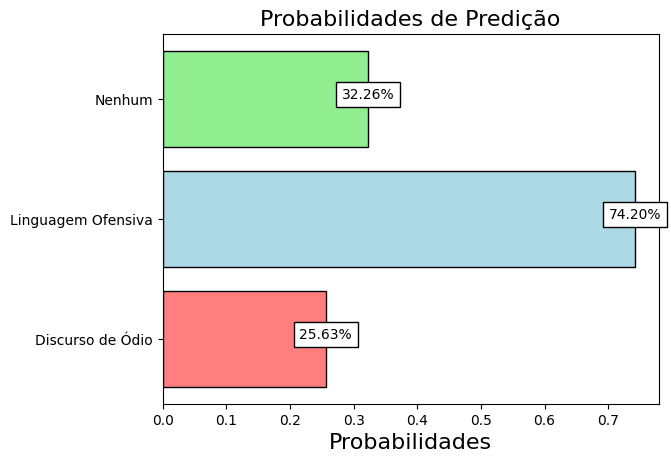

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.special import expit  # Assumindo que você esteja usando a função expit do scipy

def predict(text, labels_names):
    model.eval()
    test_dataloader = createDataloader(text)

    with torch.no_grad():
        for step_num, batch_data in tqdm(enumerate(test_dataloader)):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids=input_ids, attention_mask=att_mask, labels=labels)

            logits = output.logits.cpu().detach().numpy()
            index_pred = np.argmax(logits, axis=-1)[0]
            probabilities = expit(logits)[0]

    df = pd.DataFrame(columns=['Label', 'Probabilidade'])
    df['Label'] = labels_names
    df['Probabilidade'] = probabilities

    return index_pred, labels_names[index_pred], df

labels_names = ["Discurso de Ódio", "Linguagem Ofensiva", "Nenhum"]
# Discurso de Odio
text = "Little stupid as bitch I don't fuck with yoooooouuuu"

# Linguagem Ofensiva
# text = 'What a shitty day. I'm pissed off with everything.'

index_pred, label, df = predict(text, labels_names)

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(y[i], i, str(f'{y[i]*100:0.2f}%'), ha='center', bbox=dict(facecolor='white', alpha=1.0))

plt.clf()

pos = np.arange(len(df['Label'].values))
probabilidades = df['Probabilidade'].values

# Vermelho mais claro para Discurso de Ódio, Linguagem ofensiva azul, Verde nenhum.
# Definir as cores para cada classe

color_map = {'Nenhum': '#90EE90', 'Discurso de Ódio': '#FF7F7F', 'Linguagem Ofensiva': '#ADD8E6'}
colors = df['Label'].map(color_map).fillna('gray')  # Preencher NaN com a cor cinza

# Criar o gráfico de barras
fig = plt.barh(pos, probabilidades, color=colors, edgecolor='black')
plt.yticks(pos, df['Label'])  # Exibir cada classe no eixo y
plt.xlabel('Probabilidades', fontsize=16)
addlabels(pos, probabilidades)  # Chamar a função para adicionar rótulos de valores
plt.title('Probabilidades de Predição', fontsize=16)
plt.show()


In [ ]:
def predict_proba(sentences):
  model.eval()
  probabilities = []

  test_input_ids, test_att_masks = encode(sentences)
  BATCH_SIZE = 16
  test_y = torch.LongTensor([0] * len(sentences))
  test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
  test_sampler = SequentialSampler(test_dataset)
  test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

  with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        probabilities.append(expit(output.logits.cpu().detach().numpy()))

  probabilities = np.concatenate(probabilities)

  return probabilities

In [ ]:
labels_names=["Ódio", "insulto", "Nenhum"]

In [ ]:
explainer = LimeTextExplainer(class_names = labels_names)

In [ ]:
exp = explainer.explain_instance("These bitches don't care they just play that role.", classifier_fn = predict_proba, num_features = 10)

313it [00:34,  9.15it/s]


In [ ]:
exp.show_in_notebook(text = True)

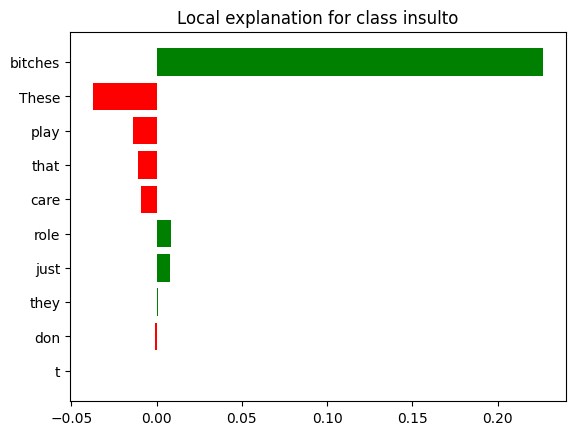

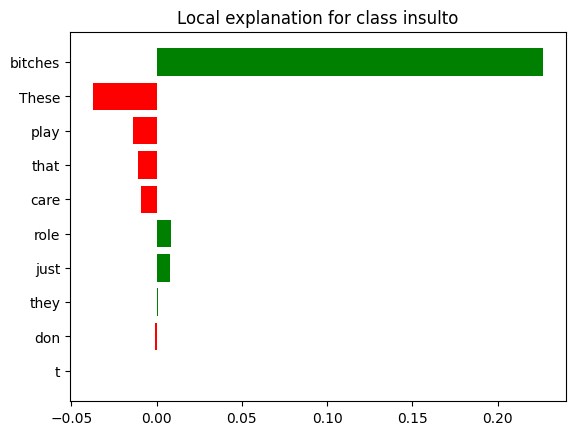

In [ ]:
exp.as_pyplot_figure()

In [ ]:
from IPython.core.display import display, HTML
display(HTML(exp.as_html()))

In [ ]:
exp = explainer.explain_instance('I am working on an important project', classifier_fn = predict_proba, num_features = 10)

313it [00:33,  9.22it/s]


In [ ]:
exp.show_in_notebook(text = True)

In [ ]:
from IPython.core.display import display, HTML
display(HTML(exp.as_html()))

In [ ]:
def execute_classify(input):

  if model != None:
    test_pred = predict(input)
    label = labels_names[test_pred[0]]
    return f"A classe prevista foi: {label}"
  else:
    return "Não há texto ou modelo para classificação!"

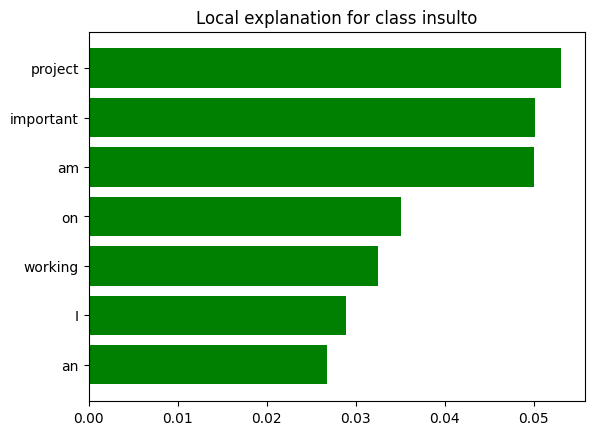

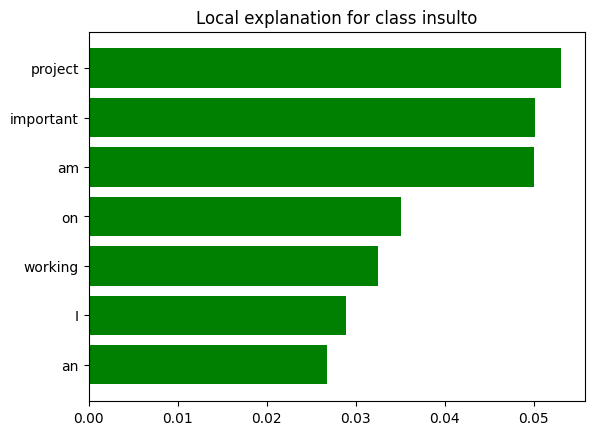

In [ ]:
exp.as_pyplot_figure()

In [ ]:
#from google.colab import output
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')